In [ ]:
pip install transformers

In [ ]:
pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 6.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import preprocess

# Read the CSV file
input_Training_csv_file = 'training_with_emojis_emoticons.csv'
input_Testing_csv_file = 'testing_with_emojis_emoticons.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(input_Training_csv_file, sep=',',
                          names=["label", "comment"])

df2 = pd.read_csv(input_Testing_csv_file, sep=',',
                          names=["label", "comment"])

# Apply the transformation function to the first column
df['comment'] = df['comment'].apply(preprocess.preprocess_text)
df2['comment'] = df2['comment'].apply(preprocess.preprocess_text)

df.head()

,label,comment
0,positive,amazing game. definitely would recommend Emot...
1,positive,i usually avoid games like this. i have this g...
2,positive,absolutely phenomenal. an amazing game had it ...
3,positive,love the game really enjoyable and all the typ...
4,positive,it is a classic cozy game with a plethora of c...


In [ ]:
df2.head()

,label,comment
0,positive,this game is amazing and i love it soooo much ...
1,positive,it is a great game with easy mechanics great f...
2,positive,one of my favorite games ever Emoticon_Happy ...
3,positive,definitely my favorite gacha world building ga...
4,positive,this game is really fun to me and the shop whe...


In [ ]:
x_train=list(df['comment'])
y_train=list(df['label'])
x_test=list(df2['comment'])
y_test=list(df2['label'])
y_train

['positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',

In [ ]:
y_train=list(pd.get_dummies(y_train,drop_first=True)['positive'])
y_test=list(pd.get_dummies(y_test,drop_first=True)['positive'])

In [ ]:
x_train

['amazing game. definitely would recommend  Emoticon_Happy   Emoticon_Happy  . game plays fun story in falling and just a nice game to play. however two things about it irk me that being about the pet and some minor gameplay issues i had. with the cat after waking up it gets in the way of the bed so i am unable to leave. with the gameplay issues i was in the mines and ate food to restore energy. froze my game lost progress. overall really good game highly recommend minor performance issues though. and the cat.  Emoticon_Kitty   Emoticon_Kitty ',
 'i usually avoid games like this. i have this game on switch and on pc. i was concerned about how hard it would be to use without a controller and just use touch screen. the controls are very intuitive if you touch a point your character will move there. it automatically uses the proper tool when touching an object to destroy. it is actually playable!  Emoticon_Laughing ',
 'absolutely phenomenal. an amazing game had it installed for years. if

In [ ]:
x_test

['this game is amazing and i love it soooo much and even though i have erased before i can still go back to my old kingdom and get everything back. here are some reasons of why this game is awesome. 1the game play graphics and the voices are amazing. 2the storyline and the cookie designs/costumes look great. 3the game has great quality and is very unique unlike a lot of other mobile games.  U+1F929 also i have recently seen that some people are having issues with lag but i have never seen that happen.  Emoticon_Smile ',
 'it is a great game with easy mechanics great for new and existing players. the kingdombuilding aspect of it is very fun and let us your creativity flow i wish there was more styles/aesthetics of items though  Emoticon_Love . solid great game  U+1F44D',
 'one of my favorite games ever  Emoticon_Happy   my only complaints are that is its quite laggy and crashes often and takes alot of storage. but those are far outweighed by its gameplay designs etc. very good game high

In [ ]:
from transformers import TFAutoModel, AutoModel, AutoTokenizer, DistilBertTokenizerFast

tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [ ]:
train_encodings = tokenizer(x_train, truncation=True, padding=True)
test_encodings = tokenizer(x_test, truncation=True, padding=True)

In [ ]:
import tensorflow as tf
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    y_train
))
test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    y_test
))

In [ ]:
pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.9 MB/s eta 0:00:00


In [ ]:
pip install scikit-learn matplotlib

In [ ]:
import numpy as np
from datasets import load_metric
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt

def compute_metrics(eval_pred):
  load_accuracy = load_metric("accuracy")
  load_f1 = load_metric("f1")
  load_recall = load_metric("recall")

  logits, labels = eval_pred
  predictions = np.argmax(logits, axis=-1)
  accuracy = load_accuracy.compute(predictions=predictions, references=labels)["accuracy"]
  f1 = load_f1.compute(predictions=predictions, references=labels)["f1"]
  recall = load_recall.compute(predictions=predictions, references=labels)["recall"]

  precision = precision_score(y_true=labels, y_pred=predictions, average='weighted')
  metrics = ["Accuracy", "F1 Score", "Precision", "Recall"]
  values = [accuracy, f1, precision, recall]

  plt.bar(metrics, values)
  plt.xlabel("Metrics")
  plt.ylabel("Values")
  plt.title("Model Evaluation Metrics")
  plt.show()

  return {"accuracy": accuracy,"precision": precision, "f1": f1, "recall": recall}

In [ ]:
pip install transformers[torch]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 6.6 MB/s eta 0:00:00


In [ ]:
from transformers import TFDistilBertForSequenceClassification, TFTrainingArguments, TFTrainer

training_args = TFTrainingArguments(
   output_dir='./results',
   per_device_train_batch_size=8,
   per_device_eval_batch_size=8,
   num_train_epochs=3,
   weight_decay=0.01,
   learning_rate=1e-5,
   eval_steps=100
)

In [ ]:
with training_args.strategy.scope():
  model = TFDistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased")

trainer = TFTrainer (
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [ ]:
trainer.train()

<ipython-input-15-efc2a80c4a6e>:7: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  load_accuracy = load_metric("accuracy")


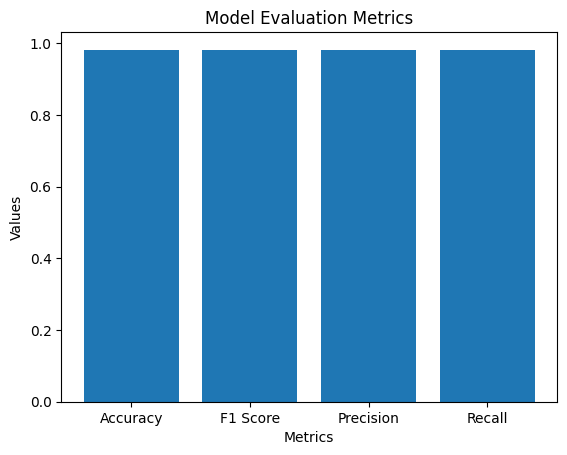

{'eval_loss': 0.06499480677174997,
 'eval_accuracy': 0.9821428571428571,
 'eval_precision': 0.9821464960941924,
 'eval_f1': 0.9821182943603851,
 'eval_recall': 0.9807692307692307}

In [ ]:
trainer.evaluate(test_dataset)

In [ ]:
trainer.save_model('distilbert_trained_with_game_reviews')

In [ ]:
from google.colab import files

In [ ]:
files.download('/content/distilbert_trained_with_game_reviews/config.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('/content/distilbert_trained_with_game_reviews/tf_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>